# Récupération des données

Deux types de classement ATP et WPA

ATP -> 1968 à 2024

Distinction simple/double homme/Femme

WPA -> 1968 à 2024


Etude python pur + pandas

Question : Distribution joeurs par pays

Sur l'ensemble des données (de 1968 à 2024) quelle est la répartition pays gagnant en fonction du type de surface du terrain. On ne considère que les matches en simple.

## I. Python brut

In [156]:
for name in list(locals().keys()):
    del locals()[name]

In [157]:
# Librairies
import time
import os
import matplotlib.pyplot as plt
import numpy as np

Initialisation du temps

In [158]:
notebook_start_time = time.time()
print("Début de l'exécution du notebook...")

Début de l'exécution du notebook...


### Récupération des données

### Récupération pour chaque catégorie / sexe du gagnant de chaque tournoi avec son origine

#### Récuperation des données

In [182]:
liste_fichier = os.listdir('donnees_tennis\ATP')

victoire_simple_homme = []

for fichier in liste_fichier:

    if fichier.startswith('atp_matches_19') or fichier.startswith('atp_matches_20') or fichier.startswith('atp_matches_futures'):
        chemin = os.path.join("donnees_tennis","ATP",str(fichier))

        with open(chemin, 'r') as fd:
            for ligne in fd:
                s = ligne.strip('\n')
                l = s.split(',')
                if l[25]=="F":
                    l_interet = [l[2],l[13]]
                    victoire_simple_homme.append(l_interet)

In [183]:
liste_fichier = os.listdir('donnees_tennis\WTA')

victoire_simple_femme = []

for fichier in liste_fichier:

    if fichier.startswith('wta_matches_19') or fichier.startswith('wta_matches_20') or fichier.startswith('wta_matches_qual'):
        chemin = os.path.join("donnees_tennis","WTA",str(fichier))

        with open(chemin, 'r') as fd:
            for ligne in fd:
                s = ligne.strip('\n')
                l = s.split(',')
                if l[25]=="F":
                    l_interet = [l[2],l[13]]
                    victoire_simple_femme.append(l_interet)

#### Creation d'un dictionnaire de dictionnaire pour compter le nombre de victoires par pays et par type de surface

Le dictionnaire de niveau 1 à pour clé le type de surface et le dictionnaire de niveau 2
 à pour clé le pays et pour valeur le nombre de victoires par homme, par femme et total.

In [184]:
dictionnaire_victoire = {}

for victoire_homme in victoire_simple_homme:
    # Test de la sufrace (dictionnaire niveau 1)

    if victoire_homme[0] != '':
        # La surface n'est pas une clé création d'un nouveau dictionnaire
        # et on initialise le nombre de victoire à 1 pour l'homme et 0 pour la femme
        if victoire_homme[0] not in dictionnaire_victoire.keys():
            dictionnaire_victoire[victoire_homme[0]] = {}
            dictionnaire_victoire[victoire_homme[0]][victoire_homme[1]] = [1,0]
        # La surface est une clé, on test le pays (dictionnaire niveau 2)
        else :
            # Le pays n'est pas une clé, création d'une nouvelle entrée
            # et on initialise le nombre de victoire à 1 pour l'homme et 0 pour la femme
            if victoire_homme[1] not in dictionnaire_victoire[victoire_homme[0]].keys():
                dictionnaire_victoire[victoire_homme[0]][victoire_homme[1]] = [1,0]
            # Le pays est une clé, on incrémente le nombre de victoire
            # pour l'homme et on laisse le nombre de victoire pour la femme inchangé
            else:
                dictionnaire_victoire[victoire_homme[0]][victoire_homme[1]][0] += 1

# On fait la même chose pour les femmes
for victoire_femme in victoire_simple_femme:
    # Test de la sufrace (dictionnaire niveau 1)
    if victoire_femme[0] != '':
        # La surface n'est pas une clé création d'un nouveau dictionnaire
        # et on initialise le nombre de victoire à 0 pour l'homme et 1 pour la femme
        if victoire_femme[0] not in dictionnaire_victoire.keys():
            print("test")
            dictionnaire_victoire[victoire_femme[0]] = {}
            dictionnaire_victoire[victoire_femme[0]][victoire_femme[1]] = [0,1]
        # La surface est une clé, on test le pays (dictionnaire niveau 2)
        else:
            # Le pays n'est pas une clé, création d'une nouvelle entrée
            # et on initialise le nombre de victoire à 0 pour l'homme et 1 pour la femme
            if victoire_femme[1] not in dictionnaire_victoire[victoire_femme[0]].keys():
                dictionnaire_victoire[victoire_femme[0]][victoire_femme[1]] = [0,1]
            # Le pays est une clé, on incrémente le nombre de victoire
            # pour la femme et on laisse le nombre de victoire pour l'homme inchangé
            else:
                dictionnaire_victoire[victoire_femme[0]][victoire_femme[1]][1] += 1

# Calcul du nombre total de victoire pour chaque pays et chaque surface
for surface in dictionnaire_victoire.keys():
    for pays in dictionnaire_victoire[surface].keys():
        victoire_tot = sum(dictionnaire_victoire[surface][pays])
        dictionnaire_victoire[surface][pays].append(victoire_tot)

### Récupération des 10 pays les plus représentés par type de surface

In [185]:
dictionnaire_top_10 = {}

for surface in dictionnaire_victoire.keys():
    data = dictionnaire_victoire[surface]

    # Trier le dictionnaire par le nombre total (le troisième élément de la liste) en ordre décroissant
    sorted_data = sorted(data.items(), key=lambda item: item[1][2], reverse=True)

    # Garder seulement les 10 premiers pays
    dictionnaire_top_10[surface] = dict(sorted_data[:10])


### Création de la représentation graphique

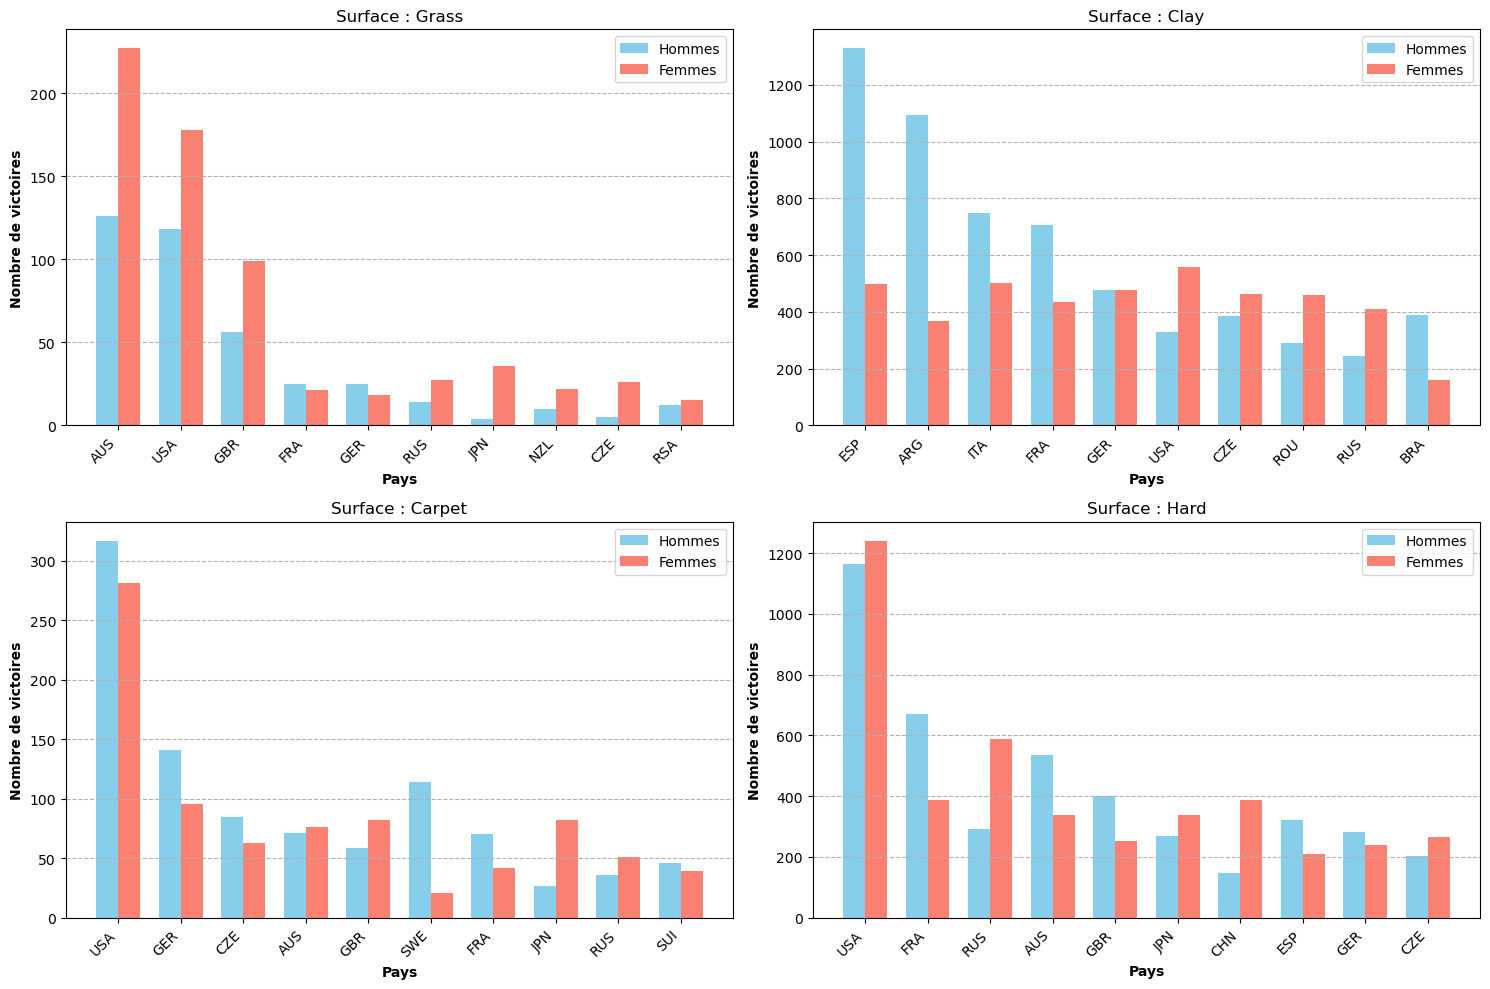

In [187]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

for i, surface in enumerate(dictionnaire_top_10.keys()):
    data_surface = dictionnaire_top_10[surface]
    pays = list(data_surface.keys())
    hommes = [data_surface[pays][0] for pays in pays]
    femmes = [data_surface[pays][1] for pays in pays]

    x = range(len(pays))
    width = 0.35

    rects1 = axes[i].bar([pos - width/2 for pos in x], hommes, width, label='Hommes', color='skyblue')
    rects2 = axes[i].bar([pos + width/2 for pos in x], femmes, width, label='Femmes', color='salmon')

    # Ajouter des étiquettes, un titre et des ticks personnalisés
    axes[i].set_ylabel('Nombre de victoires', fontweight='bold')
    axes[i].set_xlabel('Pays', fontweight='bold')
    axes[i].set_title(f'Surface : {surface}')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(pays, rotation=45, ha="right")
    axes[i].legend()
    # Ajouter une grille pour faciliter la lecture
    axes[i].grid(axis='y', linestyle='--')


fig.tight_layout()
plt.show()

In [164]:
notebook_end_time = time.time()
total_execution_time = notebook_end_time - notebook_start_time
print(f"Fin de l'exécution de la partie Pandas DataFrame.")
print(f"Temps d'exécution total du notebook : {total_execution_time:.2f} secondes")

Fin de l'exécution de la partie Pandas DataFrame.
Temps d'exécution total du notebook : 8.57 secondes


## Pandas

In [165]:
for name in list(locals().keys()):
    del locals()[name]

In [166]:
# Librairies
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Initialisation du temps

In [167]:
notebook_start_time = time.time()
print("Début de l'exécution du notebook...")

Début de l'exécution du notebook...


### Récupération des données

### Récupération pour chaque catégorie / sexe du gagnant de chaque tournoi avec son origine

#### Récuperation des données - match simple hommes

In [168]:
matchs_simple_homme = pd.DataFrame()

liste_fichier = os.listdir('donnees_tennis\ATP')
for fichier in liste_fichier:
    if fichier.startswith('atp_matches_19') or fichier.startswith('atp_matches_20'):
        data_annee = pd.read_csv('donnees_tennis\ATP\\' + fichier)
        matchs_simple_homme = pd.concat([matchs_simple_homme, data_annee], axis=0)


In [169]:
matchs_simple_homme_final = matchs_simple_homme[matchs_simple_homme["round"]=="F"]
matchs_simple_homme_final = matchs_simple_homme_final[["surface","winner_ioc"]]

#### Récuperation des données - matches espoires

In [170]:
matchs_espoir_homme  = pd.DataFrame()

liste_fichier = os.listdir('donnees_tennis\ATP')
for fichier in liste_fichier:
    if fichier.startswith('atp_matches_futures'):
        data_annee = pd.read_csv('donnees_tennis\ATP\\' + fichier)
        matchs_espoir_homme  = pd.concat([matchs_espoir_homme , data_annee], axis=0)

In [171]:
matchs_espoir_homme_final = matchs_espoir_homme[matchs_espoir_homme ["round"]=="F"]
matchs_espoir_homme_final = matchs_espoir_homme_final[["surface","winner_ioc"]]

#### Récuperation des données - matches simple femmes

In [172]:
matchs_simple_femme = pd.DataFrame()

liste_fichier = os.listdir('donnees_tennis\WTA')
for fichier in liste_fichier:
    if fichier.startswith('wta_matches_19') or fichier.startswith('wta_matches_20'):
        data_annee = pd.read_csv('donnees_tennis\WTA\\' + fichier)
        matchs_simple_femme = pd.concat([matchs_simple_femme, data_annee], axis=0)

In [173]:
matchs_simple_femme_final = matchs_simple_femme[matchs_simple_femme["round"]=="F"]
matchs_simple_femme_final = matchs_simple_femme_final[["surface","winner_ioc"]]

#### Récuperation des données - matches qualification femmes

In [174]:
matchs_qualif_femme = pd.DataFrame()

liste_fichier = os.listdir('donnees_tennis\WTA')
for fichier in liste_fichier:
    if fichier.startswith('wta_matches_qual'):
        data_annee = pd.read_csv('donnees_tennis\WTA\\' + fichier, low_memory=False)
        matchs_qualif_femme = pd.concat([matchs_qualif_femme, data_annee], axis=0)

In [175]:
matchs_qualif_femme_final = matchs_qualif_femme[matchs_qualif_femme["round"]=="F"]
matchs_qualif_femme_final = matchs_qualif_femme_final[["surface","winner_ioc"]]

### Création d'un dataFrame bilan par sexe

#### Pour ATP

In [176]:
match_bilan_homme = pd.concat([matchs_simple_homme_final,matchs_espoir_homme_final], axis=0)

resultat_homme = match_bilan_homme.groupby('surface')['winner_ioc'].value_counts().reset_index()
resultat_homme = resultat_homme.rename(columns = {"winner_ioc": "nationalite", "count" : "nb_hommes"})

### Pour WTA

In [177]:
match_bilan_femme = pd.concat([matchs_simple_femme_final,matchs_qualif_femme_final], axis=0)

resultat_femme = match_bilan_femme.groupby('surface')['winner_ioc'].value_counts().reset_index()
resultat_femme = resultat_femme.rename(columns = {"winner_ioc": "nationalite", "count" : "nb_femmes"})

### Regroupement par surface pour les hommes et les femmes

In [178]:
noms_surface = resultat_homme["surface"].unique()
resultat_graph = {}

for nom_surface in noms_surface:
    homme = resultat_homme[resultat_homme["surface"] == nom_surface].drop("surface", axis=1)
    femme = resultat_femme[resultat_femme["surface"] == nom_surface].drop("surface", axis=1)

    merged_df = pd.merge(homme, femme, on='nationalite')
    merged_df['nb_victoires'] = merged_df['nb_hommes'] + merged_df['nb_femmes']
    merged_df_sorted = merged_df.sort_values(by='nb_victoires', ascending=False).head(10)

    resultat_graph[nom_surface] = merged_df_sorted

### Représentation graphique

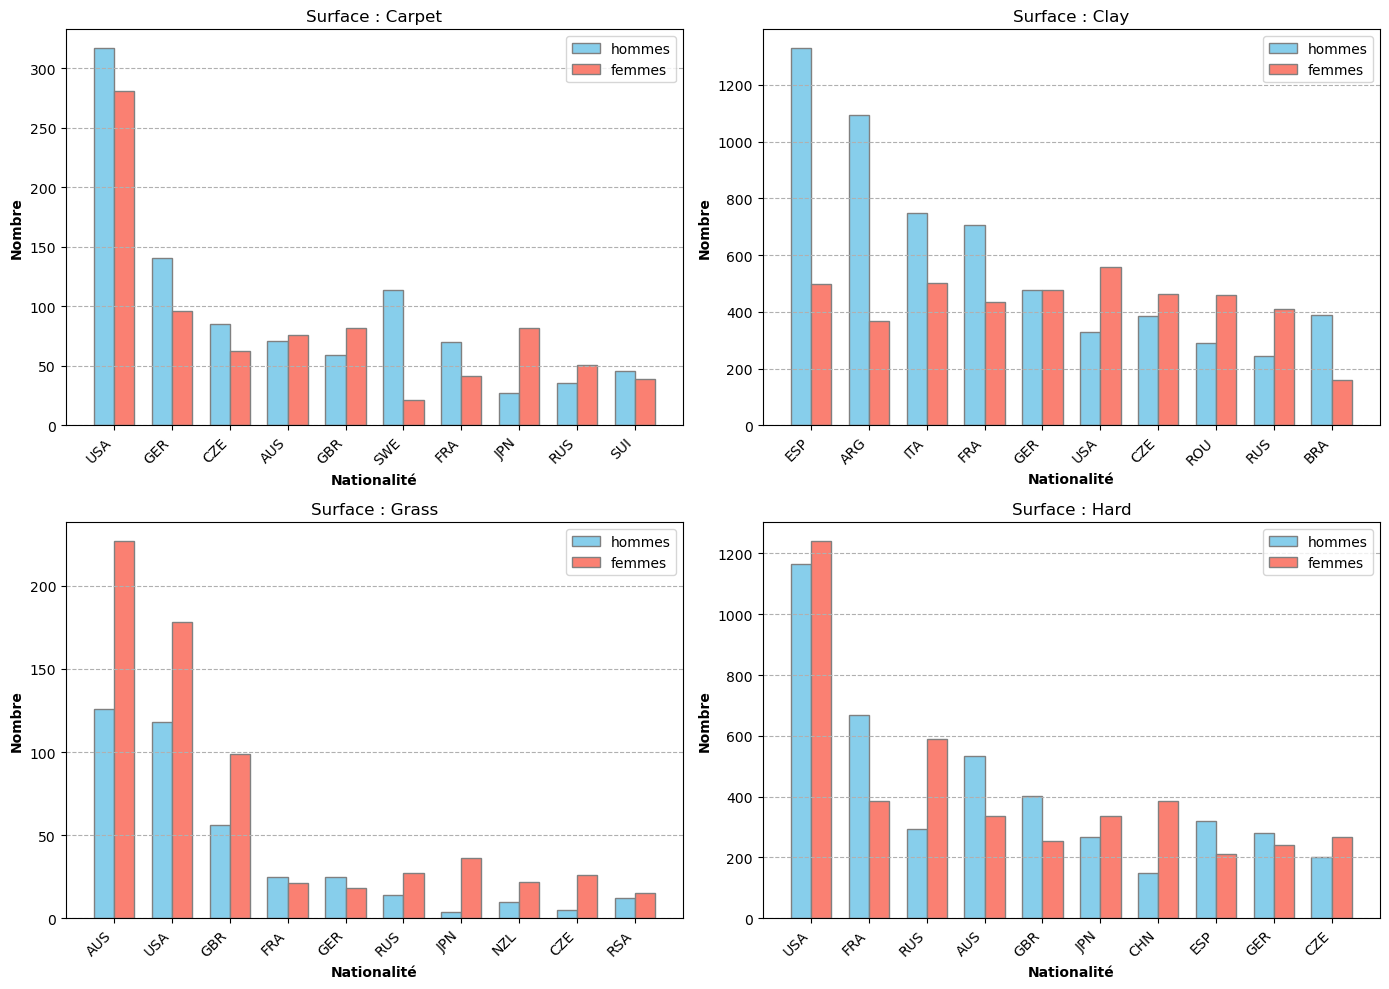

In [179]:
# Liste des clés (noms des surfaces) pour itérer
surfaces = list(resultat_graph.keys())

# Créer une figure avec une disposition de sous-plots 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

# Définir la largeur des barres
bar_width = 0.35

# Itérer sur les surfaces et créer un graphique pour chaque DataFrame
for i, surface in enumerate(surfaces):
    df = resultat_graph[surface]
    ax = axes[i]  # Sélectionner l'axe courant

    # Position des barres pour les hommes
    r1 = np.arange(len(df['nationalite']))
    # Position des barres pour les femmes (décalées par la largeur des barres)
    r2 = [x + bar_width for x in r1]

    # Créer les barres pour les hommes
    ax.bar(r1, df['nb_hommes'], color='skyblue', width=bar_width, edgecolor='grey', label='hommes')

    # Créer les barres pour les femmes
    ax.bar(r2, df['nb_femmes'], color='salmon', width=bar_width, edgecolor='grey', label='femmes')

    # Ajouter les étiquettes sur l'axe des x au centre des groupes de barres
    ax.set_xlabel('Nationalité', fontweight='bold')
    ax.set_xticks([r + bar_width/2 for r in range(len(df['nationalite']))])
    ax.set_xticklabels(df['nationalite'], rotation=45, ha='right')

    # Ajouter les étiquettes sur l'axe des y
    ax.set_ylabel('Nombre', fontweight='bold')

    # Ajouter un titre au graphique
    ax.set_title(f'Surface : {surface}')

    # Créer la légende (une seule légende pour chaque subplot)
    ax.legend()

    # Ajouter une grille pour faciliter la lecture
    ax.grid(axis='y', linestyle='--')

# Ajuster la mise en page pour éviter le chevauchement des titres et des étiquettes
plt.tight_layout()

# Afficher le graphique
plt.show()

Calcul du temps d'exécution

In [180]:
notebook_end_time = time.time()
total_execution_time = notebook_end_time - notebook_start_time
print(f"Fin de l'exécution de la partie Pandas DataFrame.")
print(f"Temps d'exécution total du notebook : {total_execution_time:.2f} secondes")

Fin de l'exécution de la partie Pandas DataFrame.
Temps d'exécution total du notebook : 23.79 secondes
